# This Jupyter script will cleanup the data for the Boston permit dataset found here: [Boston Data](https://data.boston.gov/dataset/approved-building-permits)

The following script assumes that the data sets have been downloaded and stored within the `datasets` directory.

## Import packages and load the dataset:

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../datasets/Boston_Permits.csv')

## Define some global variables

In [108]:
# BUILDING DATASET COLUMNS
CITY = 'Boston'
PERMIT_NUMBER_COL = 'Permit Number'
PERMIT_DESC_COL = 'Description'

In [109]:
df.head()

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,lat,long
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,36500.00,390.0,2021-01-28 11:29:26,2021-07-28 00:00:00,...,Mixed,0.0,181-183 State ST,Boston,MA,02109,130392,0303807000,42.359190,-71.052924
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.00,429.0,2011-11-04 11:04:58,2012-05-04 00:00:00,...,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268,2012032000,42.260750,-71.149610
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,5000.00,70.0,2020-06-01 14:08:47,,...,1-3FAM,0.0,15 Prospect ST,Charlestown,MA,02129,113443,0202837000,42.375243,-71.057585
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,74295.75,803.0,2019-11-13 13:38:56,2020-05-13 00:00:00,...,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994,0402558000,42.340600,-71.080250
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.00,206.0,2013-01-03 14:13:09,2013-07-03 00:00:00,...,1-2FAM,0.0,14 William Jackson AVE,Brighton,MA,02135,149852,2204944000,42.344600,-71.154050


## Check if there are any duplicate permits:

In [110]:
data_size = df.shape[0]
print(f"Number of records before removing duplicates: {data_size}")
df.drop_duplicates(subset=['permitnumber'])
data_size_after_drop = df.shape[0]
removed = data_size - data_size_after_drop
print(f"Removed {removed} duplicates.")

Number of records before removing duplicates: 523418
Removed 0 duplicates.


## Drop columns that will not be used:

In [111]:
keep_cols = ['permittypedescr', 'comments']
df = df[keep_cols]
df.head()

,permittypedescr,comments
0,Amendment to a Long Form,This work is to Amend Permit ALT347244. Elimin...
1,Amendment to a Long Form,Change connector link layout from attached enc...
2,Amendment to a Long Form,Amend Alt943748 to erect a roof deck as per pl...
3,Amendment to a Long Form,Build steel balcony over garden level with sta...
4,Amendment to a Long Form,Landscaping/stonework - amending permit #2801/...


## Change the column names to match other datasets

In [112]:
df = df.rename(columns={"permittypedescr": PERMIT_TYPE_DEF_COL, "comments": PERMIT_DESC_COL})

## Replace empty values with NaN and display rows that have NaN values

In [113]:
df = df.replace(' ', np.nan)
nan_values = df[df.isna().any(axis=1)]
nan_values

,Permit Type Definition,Description
94956,Electrical Permit,NaN
99667,Electrical Permit,NaN
99718,Electrical Permit,NaN
99990,Electrical Permit,NaN
107320,Electrical Permit,NaN
...,...,...
377195,Plumbing Permit,NaN
377977,Plumbing Permit,NaN
378987,Plumbing Permit,NaN
380347,Plumbing Permit,NaN


## Drop rows where at least one element is missing

In [114]:
df.dropna()

,Permit Type Definition,Description
0,Amendment to a Long Form,This work is to Amend Permit ALT347244. Elimin...
1,Amendment to a Long Form,Change connector link layout from attached enc...
2,Amendment to a Long Form,Amend Alt943748 to erect a roof deck as per pl...
3,Amendment to a Long Form,Build steel balcony over garden level with sta...
4,Amendment to a Long Form,Landscaping/stonework - amending permit #2801/...
...,...,...
523413,Use of Premises,Outdoor patio / amenity space for commercial o...
523414,Use of Premises,Outdoor patio / amenity space for commercial o...
523415,Use of Premises,Temporary Construction Trailer at Herb Chamber...
523416,Use of Premises,Owners would like to install a curb cut and a ...


## Display the count for each permit type

In [115]:
df[PERMIT_TYPE_DEF_COL].value_counts()

Short Form Bldg Permit          141184
Electrical Permit               109867
Plumbing Permit                  70067
Gas Permit                       51918
Electrical Low Voltage           42337
Long Form/Alteration Permit      34702
Electrical Fire Alarms           28540
Certificate of Occupancy         18589
Excavation Permit                11080
Electrical Temporary Service      7188
Amendment to a Long Form          3975
Erect/New Construction            2591
Use of Premises                   1290
Foundation Permit                   90
Name: Permit Type Definition, dtype: int64

## Data Graphs

<AxesSubplot:title={'center':'Permit Type Distribution'}, ylabel='Type Count'>

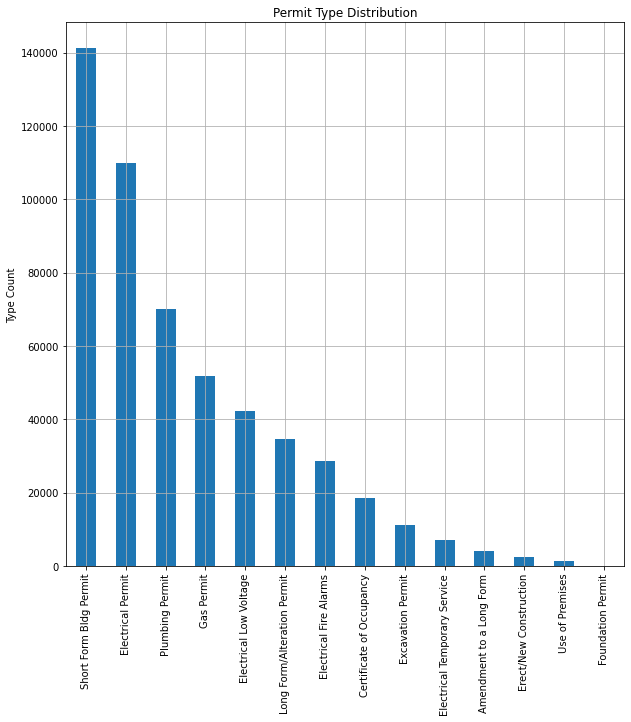

In [116]:
df[PERMIT_TYPE_DEF_COL].value_counts().plot.bar(figsize=(10,10), grid=True, title='Permit Type Distribution', ylabel='Type Count')

# Map the types into Mechanical, Building, Electrical and Plumbing

In [117]:
mappings = {
    "Electrical Permit": ['Electrical Low Voltage', 'Electrical Permit', 'Electrical Fire Alarms', 'Electrical Temporary Service'],
    "Mechanical Permit": ['Gas Permit'],
    "Building Permit": ['Short Form Bldg Permit', 'Foundation Permit', 'Amendment to a Long Form', 'Long Form/Alteration Permit', 'Certificate of Occupancy', 'Excavation Permit', 'Erect/New Construction', 'Use of Premises'],
    "Plumbing Permit": ['Plumbing Permit ']
}

for permit_type in mappings:
    for sub_type in mappings[permit_type]:
        df.loc[(getattr(df, PERMIT_TYPE_DEF_COL) == sub_type), PERMIT_TYPE_DEF_COL] = permit_type

df.head()

,Permit Type Definition,Description
0,Building Permit,This work is to Amend Permit ALT347244. Elimin...
1,Building Permit,Change connector link layout from attached enc...
2,Building Permit,Amend Alt943748 to erect a roof deck as per pl...
3,Building Permit,Build steel balcony over garden level with sta...
4,Building Permit,Landscaping/stonework - amending permit #2801/...


## Display the count for each permit type after mapping

In [118]:
df[PERMIT_TYPE_DEF_COL].value_counts()

Building Permit      213501
Electrical Permit    187932
Plumbing Permit       70067
Mechanical Permit     51918
Name: Permit Type Definition, dtype: int64

# ML Playground

## Grab X data

In [119]:
X = df.drop(columns=[PERMIT_TYPE_DEF_COL])
X.head()

,Description
0,This work is to Amend Permit ALT347244. Elimin...
1,Change connector link layout from attached enc...
2,Amend Alt943748 to erect a roof deck as per pl...
3,Build steel balcony over garden level with sta...
4,Landscaping/stonework - amending permit #2801/...


## Grab y data (Labels)

In [120]:
y = getattr(df, PERMIT_TYPE_DEF_COL)
y.head()

0    Building Permit
1    Building Permit
2    Building Permit
3    Building Permit
4    Building Permit
Name: Permit Type Definition, dtype: object

## Export X and y data to CSV

In [121]:
df.to_csv(path_or_buf=f'../datasets/clean_{CITY}DataSet.csv', index=False)

## Uncommnet the following if you would like to separate the X and y datasets into different files

In [122]:
# X.to_csv(path_or_buf=f'../datasets/X_{CITY}DataSet.csv', index=False)

In [123]:
# y.to_csv(path_or_buf=f'../datasets/y_{CITY}DataSet.csv', index=False)